In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer/Mall_Customers.csv


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [60]:
df = pd.read_csv('/kaggle/input/mall-customer/Mall_Customers.csv')

In [61]:
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [62]:
df["Genre"] = df["Genre"].map({ 'Male' : 0 , 'Female' : 1 })

In [63]:
df = df.drop('CustomerID' , axis = 1)

In [64]:
X = df[['Annual_Income_(k$)', 'Spending_Score']]

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [71]:
dbscan = DBSCAN(
    eps=15,          # you can tune this
    min_samples=5,
    metric='euclidean'
)

labels = dbscan.fit_predict(X_scaled)


In [72]:
df['Cluster'] = labels
df.head()


,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


In [73]:
print("Unique clusters:", set(labels))
print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", list(labels).count(-1))


Unique clusters: {np.int64(0)}
Number of clusters: 1
Noise points: 0


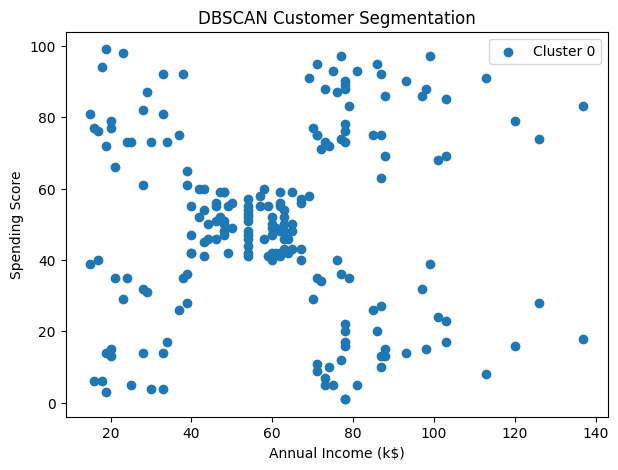

In [74]:
plt.figure(figsize=(7, 5))

for label in set(labels):
    if label == -1:
        plt.scatter(
            df['Annual_Income_(k$)'][labels == label],
            df['Spending_Score'][labels == label],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            df['Annual_Income_(k$)'][labels == label],
            df['Spending_Score'][labels == label],
            label=f'Cluster {label}'
        )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('DBSCAN Customer Segmentation')
plt.legend()
plt.show()


In [ ]:
k = 5   # same as min_samples

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
 